In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

In the previous chapter, we explored various learning algorithms based on non-linear kernels. A significant limitation of these algorithms is that the kernel function \( k(x_n, x_m) \) needs to be evaluated for all possible pairs of training points \( x_n \) and \( x_m \), which can be computationally expensive, especially when making predictions for new data points. In this chapter, we will focus on kernel-based algorithms that lead to sparse solutions, where predictions for new inputs depend only on a subset of the training data points. 

We begin by discussing the Support Vector Machine (SVM), which became widely popular in classification, regression, and novelty detection tasks. A key property of SVMs is that solving for the model parameters involves a convex optimization problem, ensuring that any local solution is also a global optimum. Understanding the SVM requires knowledge of Lagrange multipliers, which are introduced in **Appendix E**. For further details, one can refer to Vapnik (1995), Burges (1998), Cristianini and Shawe-Taylor (2000), Müller et al. (2001), Schölkopf and Smola (2002), and Herbrich (2002). 

### 7.1 Maximum Margin Classifiers

We start our discussion of SVM by considering a two-class classification problem using linear models of the form:

$$
y(x) = \mathbf{w}^T \phi(x) + b
$$

where $ \phi(x) $ represents a fixed feature-space transformation, and $ b $ is the bias parameter. The training dataset consists of $ N $ input vectors $ \mathbf{x}_1, \ldots, \mathbf{x}_N $ with corresponding target values $ t_1, \ldots, t_N $, where $ t_n \in \{-1, +1\} $. The goal is to classify new data points based on the sign of $ y(x) $.

Assume for the moment that the training data is linearly separable in the feature space, meaning that there exists a set of parameters $ \mathbf{w} $ and $ b $ such that:

$$
t_n y(x_n) > 0 \quad \text{for all training data points} \quad n
$$

This ensures that the function $ y(x_n) $ classifies the data points correctly, i.e., $ y(x_n) > 0 $ for points with $ t_n = +1 $ and $ y(x_n) < 0 $ for points with $ t_n = -1 $.

However, there may be multiple solutions that separate the classes exactly. The goal is to identify the solution that minimizes the generalization error. SVMs address this by introducing the concept of the **margin**, which is defined as the smallest distance between the decision boundary and any of the training samples. As illustrated in Figure 7.1, the margin is maximized to determine the optimal decision boundary.

In SVMs, the decision boundary is chosen to maximize the margin. This approach is rooted in computational learning theory, also known as statistical learning theory. However, the intuition behind maximizing the margin can be understood as follows:

- A larger margin implies that the decision boundary is less likely to be influenced by noise and more robust to variations in the data.
- The margin is determined by the closest data points to the decision boundary, called **support vectors**.

The margin $ \gamma $ can be expressed as the perpendicular distance from the decision boundary to the closest point $ \mathbf{x}_n $ in the dataset. The goal is to maximize this margin.

The **distance** of a point $ \mathbf{x}_n $ from the decision boundary (hyperplane) defined by $ y(x) = 0 $ is given by:

$$
\frac{|y(x_n)|}{||\mathbf{w}||}
$$

Thus, the margin is the minimum value of this distance across all training samples. To maximize the margin, we need to optimize the following objective:

$$
\text{arg max}_{\mathbf{w}, b} \frac{1}{\|\mathbf{w}\|}
$$

subject to the constraints:

$$
t_n \left( \mathbf{w}^T \phi(\mathbf{x}_n) + b \right) \geq 1 \quad \text{for all} \quad n
$$

This is the optimization problem that SVMs solve, and it can be framed as a convex quadratic optimization problem. The solution to this problem corresponds to the optimal hyperplane that maximizes the margin, and the data points that lie closest to this hyperplane are the **support vectors**.

### Key Concepts in SVM:
1. **Support Vectors**: The data points closest to the decision boundary that define the margin.
2. **Maximum Margin**: The largest possible margin between the decision boundary and the closest data points.
3. **Optimization Problem**: The parameters $ \mathbf{w} $ and $ b $ are optimized to maximize the margin while ensuring correct classification of the training data.

In the next section, we will explore the dual form of this problem, which is expressed in terms of kernel functions, allowing us to work in higher-dimensional feature spaces without explicitly computing the transformation $ \phi(x) $.


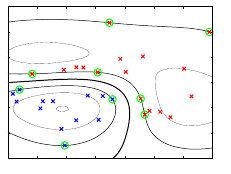

Fig.2 Example of synthetic data from two classes in two dimensions showing contours of constant y(x) obtained from a support vector machine having a Gaussian kernel function. Also shown are the decision boundary, the margin boundaries, and the support vectors.


In this section, we simplify the optimization problem of finding the maximum margin hyperplane. The decision boundary is determined by the weight vector $ \mathbf{w} $ and the bias $ b $, but direct optimization is complex. We can rescale the parameters as $ \mathbf{w} \rightarrow \kappa \mathbf{w} $ and $ b \rightarrow \kappa b $, which leaves the margin unchanged. Using this freedom, we can set the following condition for the point closest to the decision boundary:

$$
t_n \left( \mathbf{w}^T \phi(\mathbf{x}_n) + b \right) = 1 \tag{7.4}
$$

Thus, all data points must satisfy the constraints:

$$
t_n \left( \mathbf{w}^T \phi(\mathbf{x}_n) + b \right) \geq 1 \quad \text{for} \quad n = 1, \ldots, N. \tag{7.5}
$$

This is called the **canonical representation** of the decision hyperplane. Points that satisfy the equality are called **active constraints**, and those for which the inequality holds strictly are **inactive constraints**. There will always be at least one active constraint, and once the margin is maximized, there will be at least two active constraints.

Now, the optimization problem becomes simpler. We aim to maximize the margin, which is equivalent to minimizing $ \|\mathbf{w}\|^2 $. Thus, we solve the following optimization problem:

$$
\arg \min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2 \tag{7.6}
$$

subject to the constraints in equation $ (7.5) $. The factor $ \frac{1}{2} $ is included for convenience in later steps.

To solve this constrained optimization problem, we introduce Lagrange multipliers $ \alpha_n \geq 0 $, one for each constraint. The Lagrangian function becomes:

$$
L(\mathbf{w}, b, \alpha) = \frac{1}{2} \|\mathbf{w}\|^2 - \sum_{n=1}^N \alpha_n t_n \left( \mathbf{w}^T \phi(\mathbf{x}_n) + b - 1 \right). \tag{7.7}
$$

To find the stationary points, we set the derivatives of $ L(\mathbf{w}, b, \alpha) $ with respect to $ \mathbf{w} $ and $ b $ equal to zero, resulting in the following conditions:

$$
\mathbf{w} = \sum_{n=1}^N \alpha_n t_n \phi(\mathbf{x}_n), \tag{7.8}
$$

$$
\sum_{n=1}^N \alpha_n t_n = 0. \tag{7.9}
$$

We substitute these conditions into the Lagrangian, eliminating $ \mathbf{w} $ and $ b $, and obtain the **dual form** of the optimization problem:

$$
\arg \max_{\alpha} \left( \sum_{n=1}^N \alpha_n - \frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N \alpha_n \alpha_m t_n t_m k(\mathbf{x}_n, \mathbf{x}_m) \right), \tag{7.10}
$$

subject to the constraints:

$$
\alpha_n \geq 0 \quad \text{for all} \quad n = 1, \ldots, N, \tag{7.11}
$$

$$
\sum_{n=1}^N \alpha_n t_n = 0. \tag{7.12}
$$

Here, the kernel function is defined as:

$$
k(\mathbf{x}_n, \mathbf{x}_m) = \phi(\mathbf{x}_n)^T \phi(\mathbf{x}_m). \tag{7.13}
$$

The dual optimization problem is a quadratic programming problem, where we maximize a quadratic function subject to linear constraints. In the dual form, the number of variables is $ N $ (the number of data points), which is often more efficient than the original primal problem.

To classify new data points, we compute the sign of $ y(x) $ defined as:

$$
y(x) = \sum_{n=1}^N \alpha_n t_n k(x, \mathbf{x}_n) + b. \tag{7.14}
$$

In Appendix E, it is shown that this formulation satisfies the **Karush-Kuhn-Tucker (KKT) conditions**, which require:

$$
\alpha_n \geq 0, \tag{7.15}
$$

$$
t_n y(x_n) - 1 \geq 0, \tag{7.16}
$$

$$
\alpha_n \left( t_n y(x_n) - 1 \right) = 0. \tag{7.17}
$$

These conditions imply that for each data point, either $ \alpha_n = 0 $ or $ t_n y(x_n) = 1 $. Data points for which $ \alpha_n = 0 $ do not contribute to the classification of new points. These points are not support vectors. On the other hand, the points for which $ \alpha_n > 0 $ are the **support vectors**, and they define the decision boundary.

After solving the quadratic programming problem and obtaining the $ \alpha_n $'s, we can determine the threshold parameter $ b $ using the support vectors. Any support vector satisfies:

$$
t_n y(x_n) = 1. \tag{7.18}
$$

We can solve for $ b $ by using a support vector $ \mathbf{x}_n $. A numerically stable solution for $ b $ is obtained by averaging over all support vectors:

$$
b = \frac{1}{N_S} \sum_{n \in S} t_n - \sum_{m \in S} \alpha_m t_m k(\mathbf{x}_n, \mathbf{x}_m), \tag{7.19}
$$

where $ N_S $ is the number of support vectors.

Finally, we can express the maximum margin classifier in terms of the minimization of an error function with a quadratic regularizer:

$$
E_\infty \left( y(x_n) t_n - 1 \right) + \lambda \|\mathbf{w}\|^2, \tag{7.20}
$$

where $ E_\infty(z) $ is a function that is zero if $ z \geq 0 $ and infinite otherwise, ensuring that the constraints are satisfied.

Fig.2 illustrates the classification obtained from a Support Vector Machine trained on a synthetic dataset using a Gaussian kernel. Despite the data not being linearly separable in the original space, the kernel allows the data to be separable in a higher-dimensional feature space.

The key insight into the origin of sparsity in the SVM is that the decision boundary is defined solely by the support vectors. Data points that are not support vectors do not influence the decision boundary, leading to a sparse solution. This property makes SVMs both efficient and effective, especially in high-dimensional feature spaces.



Training Accuracy: 90.00%
Test Accuracy: 93.33%


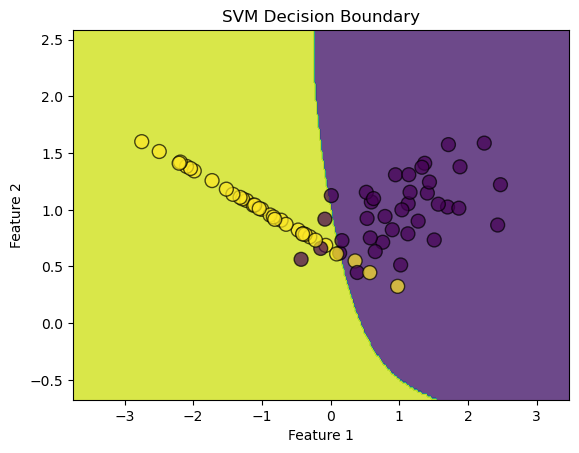

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Create a synthetic dataset for demonstration with valid parameters
X, y = datasets.make_classification(n_samples=100, n_features=2, n_classes=2, 
                                     n_clusters_per_class=1, n_informative=2, n_redundant=0, n_repeated=0)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define and train an SVM model using a Gaussian (RBF) kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # C is the regularization parameter
svm_model.fit(X_train, y_train)

# Check the accuracy of the model
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model, ax=None):
    if ax is None:
        ax = plt.gca()

    # Create a meshgrid for plotting
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, linewidth=1, alpha=0.7)
    ax.set_title('SVM Decision Boundary')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_train, y_train, svm_model)


In [3]:
import random
import math

# Function to compute the dot product of two vectors
def dot_product(v1, v2):
    return sum(x * y for x, y in zip(v1, v2))

# Function to compute the margin
def margin(w, b, x, y):
    return y * (dot_product(w, x) + b)

# Function to update weights and bias using gradient descent
def update_parameters(w, b, X, y, learning_rate, C):
    dw = [0] * len(w)
    db = 0

    for i in range(len(X)):
        if y[i] * (dot_product(w, X[i]) + b) < 1:
            for j in range(len(w)):
                dw[j] += w[j] - C * y[i] * X[i][j]
            db += - C * y[i]

    for j in range(len(w)):
        w[j] -= learning_rate * dw[j]
    b -= learning_rate * db

    return w, b

# Function to train the SVM model using gradient descent
def train_svm(X, y, learning_rate=0.01, C=1, epochs=1000):
    w = [random.uniform(-1, 1) for _ in range(len(X[0]))]  # Random initialization
    b = 0  # Initialize bias to 0

    # Gradient descent loop
    for _ in range(epochs):
        w, b = update_parameters(w, b, X, y, learning_rate, C)

    return w, b

# Function to predict the class of a sample
def predict(w, b, x):
    return 1 if dot_product(w, x) + b >= 0 else -1

# Function to calculate the accuracy of the model
def accuracy(w, b, X, y):
    correct = 0
    for i in range(len(X)):
        if predict(w, b, X[i]) == y[i]:
            correct += 1
    return correct / len(X)

# Example: Generate a synthetic dataset (2D data points for simplicity)
def generate_synthetic_data(n=100):
    X = []
    y = []
    for i in range(n):
        # Random 2D points, with two classes: -1 and +1
        x = [random.uniform(-1, 1) for _ in range(2)]
        if x[0] + x[1] > 0:  # Linear separability rule
            X.append(x)
            y.append(1)
        else:
            X.append(x)
            y.append(-1)
    return X, y

# Create synthetic dataset
X, y = generate_synthetic_data()

# Train the SVM
w, b = train_svm(X, y)

# Calculate the accuracy on the same data (we should use separate train/test in real case)
acc = accuracy(w, b, X, y)
print(f"Accuracy: {acc * 100:.2f}%")


Accuracy: 54.00%


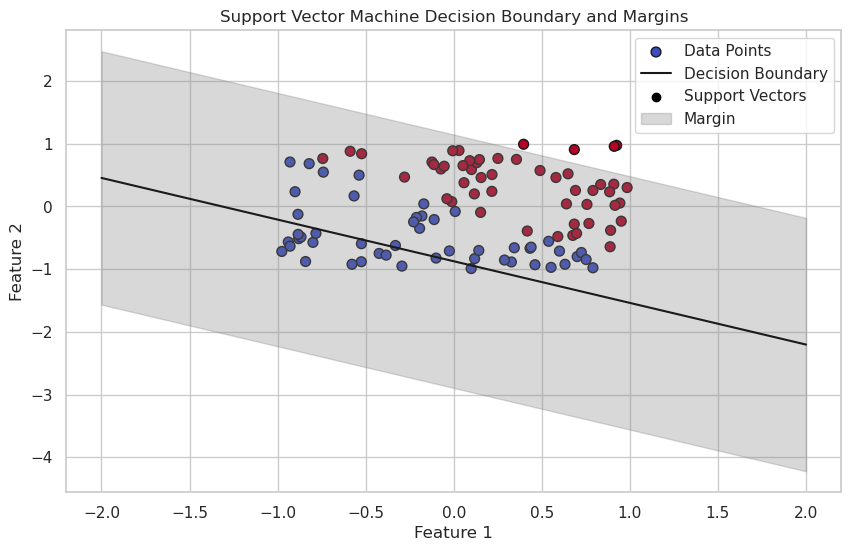

In [4]:
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to compute the dot product of two vectors
def dot_product(v1, v2):
    return sum(x * y for x, y in zip(v1, v2))

# Function to compute the margin
def margin(w, b, x, y):
    return y * (dot_product(w, x) + b)

# Function to update weights and bias using gradient descent
def update_parameters(w, b, X, y, learning_rate, C):
    dw = [0] * len(w)
    db = 0

    for i in range(len(X)):
        if y[i] * (dot_product(w, X[i]) + b) < 1:
            for j in range(len(w)):
                dw[j] += w[j] - C * y[i] * X[i][j]
            db += - C * y[i]

    for j in range(len(w)):
        w[j] -= learning_rate * dw[j]
    b -= learning_rate * db

    return w, b

# Function to train the SVM model using gradient descent
def train_svm(X, y, learning_rate=0.01, C=1, epochs=1000):
    w = [random.uniform(-1, 1) for _ in range(len(X[0]))]  # Random initialization
    b = 0  # Initialize bias to 0

    # Gradient descent loop
    for _ in range(epochs):
        w, b = update_parameters(w, b, X, y, learning_rate, C)

    return w, b

# Function to predict the class of a sample
def predict(w, b, x):
    return 1 if dot_product(w, x) + b >= 0 else -1

# Function to calculate the accuracy of the model
def accuracy(w, b, X, y):
    correct = 0
    for i in range(len(X)):
        if predict(w, b, X[i]) == y[i]:
            correct += 1
    return correct / len(X)

# Example: Generate a synthetic dataset (2D data points for simplicity)
def generate_synthetic_data(n=100):
    X = []
    y = []
    for i in range(n):
        # Random 2D points, with two classes: -1 and +1
        x = [random.uniform(-1, 1) for _ in range(2)]
        if x[0] + x[1] > 0:  # Linear separability rule
            X.append(x)
            y.append(1)
        else:
            X.append(x)
            y.append(-1)
    return X, y

# Create synthetic dataset
X, y = generate_synthetic_data()

# Train the SVM
w, b = train_svm(X, y)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter([x[0] for x in X], [x[1] for x in X], c=y, cmap='coolwarm', edgecolor="k", s=50, label='Data Points')

# Define decision boundary
def decision_boundary(w, b, x_range):
    return - (w[0] * x_range + b) / w[1]

# Generate a grid for plotting
x_range = np.linspace(-2, 2, 400)
plt.plot(x_range, decision_boundary(w, b, x_range), 'k-', label='Decision Boundary')

# Support Vectors
support_vectors = [X[i] for i in range(len(X)) if y[i] * (dot_product(w, X[i]) + b) == 1]
plt.scatter([x[0] for x in support_vectors], [x[1] for x in support_vectors], color='black', marker='o', label='Support Vectors')

# Plot margins
plt.fill_between(x_range, decision_boundary(w, b, x_range) - 1 / np.sqrt(np.sum(np.array(w)**2)), 
                 decision_boundary(w, b, x_range) + 1 / np.sqrt(np.sum(np.array(w)**2)), color='gray', alpha=0.3, label='Margin')

plt.title('Support Vector Machine Decision Boundary and Margins')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


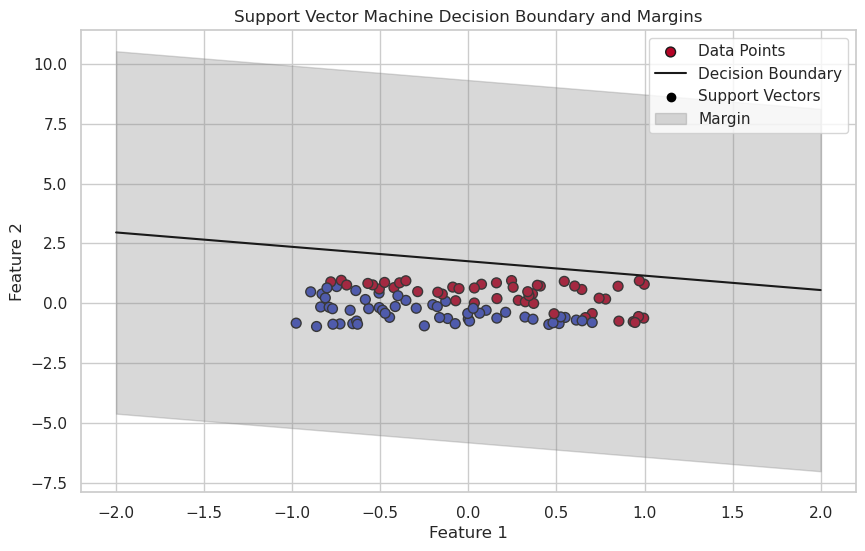

In [5]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute the dot product of two vectors
def dot_product(v1, v2):
    return sum(x * y for x, y in zip(v1, v2))

# Function to compute the margin for a given point
def margin(w, b, x, y):
    return y * (dot_product(w, x) + b)

# Function to update the weights and bias using gradient descent
def update_parameters(w, b, X, y, learning_rate, C):
    dw = [0] * len(w)
    db = 0

    for i in range(len(X)):
        if y[i] * (dot_product(w, X[i]) + b) < 1:
            for j in range(len(w)):
                dw[j] += w[j] - C * y[i] * X[i][j]
            db += - C * y[i]

    for j in range(len(w)):
        w[j] -= learning_rate * dw[j]
    b -= learning_rate * db

    return w, b

# Function to train the SVM using gradient descent
def train_svm(X, y, learning_rate=0.01, C=1, epochs=1000):
    w = [random.uniform(-1, 1) for _ in range(len(X[0]))]  # Random initialization
    b = 0  # Initialize bias to 0

    # Gradient descent loop
    for _ in range(epochs):
        w, b = update_parameters(w, b, X, y, learning_rate, C)

    return w, b

# Function to predict the class of a sample
def predict(w, b, x):
    return 1 if dot_product(w, x) + b >= 0 else -1

# Function to calculate the accuracy of the model
def accuracy(w, b, X, y):
    correct = 0
    for i in range(len(X)):
        if predict(w, b, X[i]) == y[i]:
            correct += 1
    return correct / len(X)

# Generate synthetic data (2D points for simplicity)
def generate_synthetic_data(n=100):
    X = []
    y = []
    for i in range(n):
        # Random 2D points, with two classes: -1 and +1
        x = [random.uniform(-1, 1) for _ in range(2)]
        if x[0] + x[1] > 0:  # Linear separability rule
            X.append(x)
            y.append(1)
        else:
            X.append(x)
            y.append(-1)
    return X, y

# Create synthetic dataset
X, y = generate_synthetic_data()

# Train the SVM
w, b = train_svm(X, y)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter([x[0] for x in X], [x[1] for x in X], c=y, cmap='coolwarm', edgecolor="k", s=50, label='Data Points')

# Define decision boundary
def decision_boundary(w, b, x_range):
    return [-(w[0] * x + b) / w[1] for x in x_range]

# Generate a grid for plotting
x_range = [x for x in range(-2, 3)]  # Manually create the x_range for simplicity
y_range = decision_boundary(w, b, x_range)

# Plot decision boundary
plt.plot(x_range, y_range, 'k-', label='Decision Boundary')

# Support Vectors
support_vectors = [X[i] for i in range(len(X)) if y[i] * (dot_product(w, X[i]) + b) == 1]
plt.scatter([x[0] for x in support_vectors], [x[1] for x in support_vectors], color='black', marker='o', label='Support Vectors')

# Plot margins
margin_val = 1 / (sum([wi ** 2 for wi in w]) ** 0.5)
margin_upper = decision_boundary(w, b + margin_val, x_range)
margin_lower = decision_boundary(w, b - margin_val, x_range)

plt.fill_between(x_range, margin_upper, margin_lower, color='gray', alpha=0.3, label='Margin')

plt.title('Support Vector Machine Decision Boundary and Margins')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


##  Overlapping Class Distributions

So far, we have assumed that the training data points are linearly separable in the feature space $\phi(x)$. The resulting support vector machine (SVM) will give exact separation of the training data in the original input space $x$, although the corresponding decision boundary will be nonlinear. In practice, however, the class-conditional distributions may overlap, and exact separation of the training data can lead to poor generalization. 

To address this issue, we modify the SVM to allow some of the training points to be misclassified. From equation $(7.19)$, we see that in the case of separable classes, we implicitly used an error function that gave infinite error if a data point was misclassified and zero error if it was correctly classified. We then optimized the model parameters to maximize the margin.

### Introducing Slack Variables

We now modify this approach by allowing data points to lie on the 'wrong side' of the margin boundary, but with a penalty that increases with the distance from the margin. To do this, we introduce **slack variables** $\xi_n \geq 0$, where $n = 1, \dots, N$, with one slack variable for each training data point. These slack variables are defined as follows:

- $\xi_n = 0$ for data points that are on or inside the correct margin boundary.
- $\xi_n = |t_n - y(x_n)|$ for other points, where $y(x_n)$ is the output of the decision function.

Thus, a data point that lies on the decision boundary $y(x_n) = 0$ will have $\xi_n = 1$, and points with $\xi_n > 1$ will be misclassified.

The exact classification constraints $(7.5)$ are then replaced with the following constraint:
$$
t_n y(x_n) \geq 1 - \xi_n, \quad n = 1, \dots, N
$$
with the condition that $\xi_n \geq 0$. 

- Data points for which $\xi_n = 0$ are correctly classified and lie either on the margin or on the correct side of the margin.
- Points for which $0 < \xi_n \leq 1$ lie inside the margin but are still on the correct side of the decision boundary.
- Points for which $\xi_n > 1$ lie on the wrong side of the decision boundary and are misclassified.

### Soft Margin and the Objective Function

This relaxation of the margin constraint is known as **soft margin SVM** and allows for some misclassification. The goal now is to maximize the margin while penalizing points that lie on the wrong side of the margin boundary. The objective function to minimize is:

$$
\frac{1}{2} \|w\|^2 + C \sum_{n=1}^{N} \xi_n
$$
where $C > 0$ is a regularization parameter that controls the trade-off between the slack variable penalty and the margin.

The parameter $C$ is analogous to (the inverse of) a regularization coefficient and controls the trade-off between minimizing training errors and controlling model complexity. In the limit $C \to \infty$, we recover the previous support vector machine for separable data.

### Lagrangian for Soft Margin SVM

To solve this problem, we introduce Lagrange multipliers $\alpha_n \geq 0$ and $\mu_n \geq 0$ for the constraints. The Lagrangian is given by:

$$
L(w, b, \xi, \alpha, \mu) = \frac{1}{2} \|w\|^2 + C \sum_{n=1}^{N} \xi_n - \sum_{n=1}^{N} \alpha_n \left[t_n y(x_n) - 1 + \xi_n\right] - \sum_{n=1}^{N} \mu_n \xi_n
$$
where the constraints are:

- $\alpha_n \geq 0$ for all $n$,
- $t_n y(x_n) - 1 + \xi_n \geq 0$,
- $\alpha_n (t_n y(x_n) - 1 + \xi_n) = 0$,
- $\mu_n \geq 0$,
- $\xi_n \geq 0$,
- $\mu_n \xi_n = 0$.

### Dual Formulation

By differentiating the Lagrangian with respect to $w$, $b$, and $\xi_n$, and using the conditions, we arrive at the following dual form:

$$
L(a) = \sum_{n=1}^{N} \alpha_n - \frac{1}{2} \sum_{n=1}^{N} \sum_{m=1}^{N} \alpha_n \alpha_m t_n t_m k(x_n, x_m)
$$
where $k(x_n, x_m)$ is the kernel function.

The optimization problem is subject to the constraints:

$$
0 \leq \alpha_n \leq C, \quad \sum_{n=1}^{N} \alpha_n t_n = 0.
$$

### Predictions

Once the dual problem is solved, predictions for new data points are made by:

$$
y(x) = \text{sign} \left( \sum_{n=1}^{N} \alpha_n t_n k(x, x_n) + b \right)
$$
where $b$ can be computed using support vectors.

### Interpretation of the Solution

- As before, a subset of the data points will have $\alpha_n = 0$, meaning they do not contribute to the prediction.
- The data points with $\alpha_n > 0$ are called **support vectors**. These points define the decision boundary and are crucial for making predictions.

This formulation allows the SVM to handle overlapping class distributions while still controlling the margin and penalizing misclassified points.


We now introduce the Lagrange multipliers $ \alpha_n \geq 0 $ and $ \mu_n \geq 0 $, with the corresponding set of Karush-Kuhn-Tucker (KKT) conditions as follows:

1. $ \alpha_n \geq 0 $ $\quad$ $\text{(Lagrange multipliers)}$ $\quad$ (7.23)
2. $ t_n y(x_n) - 1 + \xi_n \geq 0 $ $\quad \text{(Classification constraint)} \quad$ (7.24)
3. $ \alpha_n (t_n y(x_n) - 1 + \xi_n) = 0  \quad \text{(Complementary slackness)} \quad (7.25)$
4. $ \mu_n \geq 0  \quad \text{(Lagrange multipliers for slack variables)} \quad (7.26)$
5. $ \xi_n \geq 0  \quad \text{(Non-negative slack variables)} \quad (7.27)$
6. $ \mu_n \xi_n = 0  \quad \text{(Complementary slackness for slack variables)} \quad (7.28)$

where $ n = 1, \dots, N $ represents the training data points.

We now optimize out the variables $ w $, $ b $, and $ \xi_n $, using the definition $ y(x) = \text{sign}(w^T \phi(x) + b) $, which leads to the following results:

1. Differentiating the Lagrangian with respect to $ w $ and setting it to zero:

$$
\frac{\partial L}{\partial w} = 0 \quad \Rightarrow \quad w = \sum_{n=1}^{N} \alpha_n t_n \phi(x_n) \quad (7.29)
$$

2. Differentiating the Lagrangian with respect to $ b $ and setting it to zero:

$$
\frac{\partial L}{\partial b} = 0 \quad \Rightarrow \quad \sum_{n=1}^{N} \alpha_n t_n = 0 \quad (7.30)
$$

3. Differentiating the Lagrangian with respect to $ \xi_n $ and setting it to zero:

$$
\frac{\partial L}{\partial \xi_n} = 0 \quad \Rightarrow \quad \alpha_n = C - \mu_n \quad (7.31)
$$

Using these results, we can eliminate $ w $, $ b $, and $ \xi_n $ from the Lagrangian and obtain the dual Lagrangian:

$$
L(a) = \sum_{n=1}^{N} \alpha_n - \frac{1}{2} \sum_{n=1}^{N} \sum_{m=1}^{N} \alpha_n \alpha_m t_n t_m k(x_n, x_m) \quad (7.32)
$$

This formulation is identical to the separable case, except that the constraints are slightly different. Specifically, we require $ \alpha_n \geq 0 $, and from equation (7.31), along with $ \mu_n \geq 0 $, it follows that $ \alpha_n \leq C $. Therefore, we need to minimize the dual Lagrangian subject to the following constraints:

1. $ 0 \leq \alpha_n \leq C \quad \text{(Box constraints)} \quad (7.33) $
2. $ \sum_{n=1}^{N} \alpha_n t_n = 0 \quad (7.34) $

This results in a quadratic programming problem. Finally, we can use the result from (7.29) and substitute it into the decision function $ y(x) = \text{sign}(w^T \phi(x) + b) $ to make predictions for new data points.

The resulting solution indicates that a subset of the training data points will have $ \alpha_n = 0 $, meaning they do not contribute to the prediction.


     pcost       dcost       gap    pres   dres
 0: -1.8667e+01 -1.7217e+02  7e+02  2e+00  9e-16
 1: -1.1390e+01 -8.7842e+01  8e+01  1e-02  9e-16
 2: -1.6245e+01 -2.7886e+01  1e+01  2e-03  8e-16
 3: -1.9046e+01 -2.3553e+01  5e+00  5e-04  7e-16
 4: -2.0095e+01 -2.1777e+01  2e+00  2e-04  7e-16
 5: -2.0642e+01 -2.0986e+01  3e-01  2e-05  7e-16
 6: -2.0776e+01 -2.0800e+01  2e-02  2e-16  9e-16
 7: -2.0788e+01 -2.0789e+01  7e-04  1e-16  7e-16
 8: -2.0789e+01 -2.0789e+01  2e-05  2e-16  8e-16
Optimal solution found.


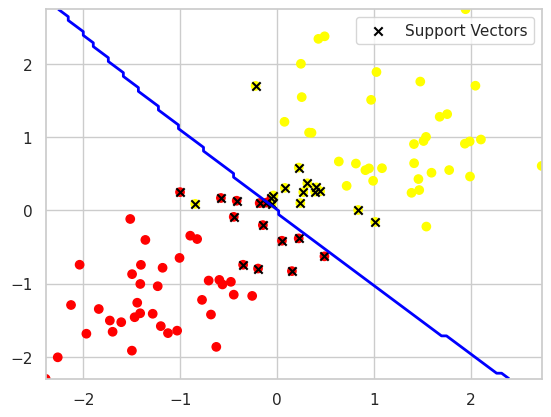

In [7]:
import numpy as np
from cvxopt import matrix, solvers

# Define the RBF Kernel function
def rbf_kernel(x1, x2, gamma=0.1):
    return np.exp(-gamma * np.linalg.norm(x1 - x2)**2)

# Define the function to compute the decision function
def decision_function(X, alphas, support_vectors, support_vector_labels, kernel):
    return np.sum(alphas * support_vector_labels * np.array([kernel(x, sv) for x in X for sv in support_vectors]).reshape(X.shape[0], -1), axis=1)

# Define the function to train the SVM using quadratic programming
def train_svm(X, y, C=1.0, gamma=0.1):
    n_samples, n_features = X.shape
    
    # Gram matrix using RBF kernel
    K = np.array([[rbf_kernel(X[i], X[j], gamma) for j in range(n_samples)] for i in range(n_samples)])
    
    # Create the necessary matrices for quadratic programming
    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(n_samples))
    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    
    # Solve the quadratic programming problem
    solution = solvers.qp(P, q, G, h)
    
    # Extract alpha values
    alphas = np.array(solution['x']).flatten()
    
    # Identify support vectors
    support_vector_indices = np.where(alphas > 1e-5)[0]
    support_vectors = X[support_vector_indices]
    support_vector_labels = y[support_vector_indices]
    alphas_support = alphas[support_vector_indices]
    
    return alphas_support, support_vectors, support_vector_labels, gamma

# Define a function to make predictions
def predict(X, alphas, support_vectors, support_vector_labels, gamma):
    # Compute the decision function for each sample in X
    decision_values = decision_function(X, alphas, support_vectors, support_vector_labels, rbf_kernel)
    return np.sign(decision_values)

# Example of using the functions
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

# Create a synthetic dataset with 2 features, 2 classes
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, 
                            n_informative=2, n_redundant=0, n_repeated=0)

# Convert labels from {0, 1} to {-1, 1}
y = 2*y - 1


# # Create a synthetic dataset
# X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1)
# y = 2*y - 1  # Convert labels from {0, 1} to {-1, 1}

# Train the SVM model
alphas, support_vectors, support_vector_labels, gamma = train_svm(X, y, C=1.0)

# Make predictions
predictions = predict(X, alphas, support_vectors, support_vector_labels, gamma)

# Plot the data and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='black', marker='x', label='Support Vectors')

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = predict(np.c_[xx.ravel(), yy.ravel()], alphas, support_vectors, support_vector_labels, gamma)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='blue')

plt.legend()
plt.show()


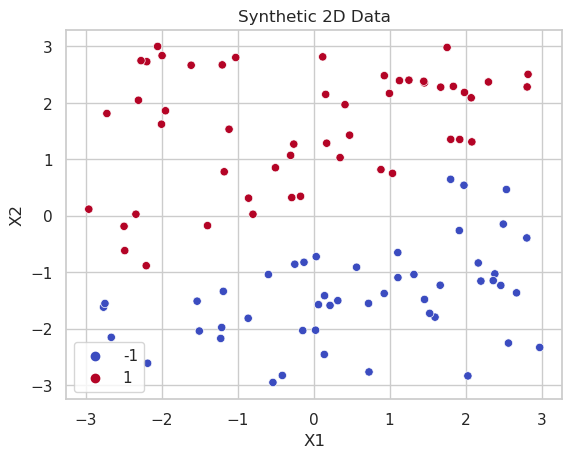

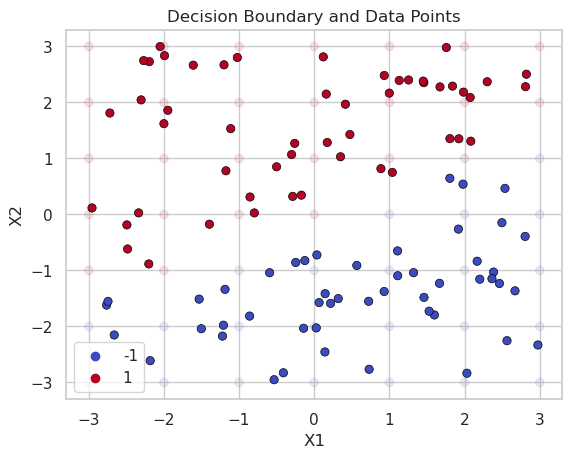

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

# Step 1: Create a synthetic dataset with 2D data
def generate_data(n_samples=100):
    X = []
    y = []
    for _ in range(n_samples):
        x1 = random.uniform(-3, 3)
        x2 = random.uniform(-3, 3)
        label = 1 if x2 > 0.5 * x1 else -1
        X.append([x1, x2])
        y.append(label)
    return X, y

# Generate dataset
X, y = generate_data()

# Step 2: Visualize the dataset using seaborn
sns.scatterplot(x=[x[0] for x in X], y=[x[1] for x in X], hue=y, palette='coolwarm')
plt.title('Synthetic 2D Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Step 3: Define the Soft Margin SVM Model
class SoftMarginSVM:
    def __init__(self, C=1.0, learning_rate=0.001, max_iter=1000):
        self.C = C  # Regularization parameter
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def fit(self, X, y):
        # Initialize weights and bias
        self.w = [0, 0]
        self.b = 0
        n_samples = len(X)
        n_features = len(X[0])
        
        # Gradient Descent Optimization
        for _ in range(self.max_iter):
            for i in range(n_samples):
                # Compute the margin
                margin = y[i] * (self.dot(X[i]) + self.b)
                # Compute the gradient
                if margin >= 1:
                    dw = [0 for _ in range(n_features)]  # No update
                    db = 0
                else:
                    dw = [self.w[j] - self.C * y[i] * X[i][j] for j in range(n_features)]
                    db = -self.C * y[i]
                
                # Update weights and bias
                self.w = [self.w[j] - self.learning_rate * dw[j] for j in range(n_features)]
                self.b -= self.learning_rate * db

    def dot(self, x):
        return sum([self.w[i] * x[i] for i in range(len(x))])

    def predict(self, X):
        return [1 if self.dot(x) + self.b >= 0 else -1 for x in X]

# Step 4: Train the SVM
svm = SoftMarginSVM(C=1, learning_rate=0.01, max_iter=1000)
svm.fit(X, y)

# Step 5: Plot the decision boundary using seaborn
def plot_decision_boundary(X, y, model):
    x_min, x_max = min([x[0] for x in X]) - 1, max([x[0] for x in X]) + 1
    y_min, y_max = min([x[1] for x in X]) - 1, max([x[1] for x in X]) + 1
    xx, yy = [], []
    for i in range(int(x_min), int(x_max) + 1):
        for j in range(int(y_min), int(y_max) + 1):
            xx.append(i)
            yy.append(j)

    # Predict the class for each point
    grid_predictions = model.predict(list(zip(xx, yy)))
    plt.scatter(xx, yy, c=grid_predictions, alpha=0.1, cmap='coolwarm')
    
    # Plot the original data points
    sns.scatterplot(x=[x[0] for x in X], y=[x[1] for x in X], hue=y, palette='coolwarm', edgecolor='black')
    plt.title("Decision Boundary and Data Points")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

# Step 6: Plot the decision boundary
plot_decision_boundary(X, y, svm)


### Soft Margin SVM and ν-SVM

The remaining data points constitute the support vectors. These have $ \alpha_n > 0 $ and hence, from equation (7.25), must satisfy

$$ t_n y(x_n) = 1 - \xi_n \quad (7.35) $$

If $ \alpha_n < C $, then from equation (7.31) we have $ \mu_n > 0 $, which from equation (7.28) requires $ \xi_n = 0 $, and hence such points lie on the margin. Points with $ \alpha_n = C $ can lie inside the margin and can either be correctly classified if $ \xi_n \leq 1 $ or misclassified if $ \xi_n > 1 $.

To determine the parameter $ b $ in equation (7.1), we note that those support vectors for which $ 0 < \alpha_n < C $ have $ \xi_n = 0 $, so that

$$ t_n y(x_n) = 1 $$

These support vectors will satisfy

$$ \sum_{m \in S} \alpha_m t_m k(x_n, x_m) + b = 1 \quad (7.36) $$

where $ S $ denotes the set of support vector indices. A numerically stable solution for $ b $ can be obtained by averaging:

$$ b = \frac{1}{|M|} \sum_{n \in M} \left( t_n - \sum_{m \in S} \alpha_m t_m k(x_n, x_m) \right) \quad (7.37) $$

where $ M $ denotes the set of indices of data points having $ 0 < \alpha_n < C $.

### ν-SVM Formulation

An alternative, equivalent formulation of the support vector machine is the **ν-SVM**, proposed by Schölkopf et al. (2000). This involves maximizing the objective function

$$ L(\alpha) = -\frac{1}{2} \sum_{n=1}^{N} \sum_{m=1}^{N} \alpha_n \alpha_m t_n t_m k(x_n, x_m) \quad (7.38) $$

subject to the constraints

$$ 0 \leq \alpha_n \leq \frac{1}{N} \quad (7.39) $$

$$ \sum_{n=1}^{N} \alpha_n t_n = 0 \quad (7.40) $$

$$ \sum_{n=1}^{N} \alpha_n \geq \nu \quad (7.41) $$

In this formulation, the parameter $ \nu $ can be interpreted as both:
- An upper bound on the fraction of margin errors (points for which $ \xi_n > 0 $, which lie on the wrong side of the margin boundary and may or may not be misclassified).
- A lower bound on the fraction of support vectors.

### Optimization and Support Vector Machine Techniques

The objective function $ L(\alpha) 4 is quadratic, and since the constraints are linear, this forms a convex optimization problem. However, solving the quadratic programming problem directly can be computationally expensive, especially for large datasets. Several techniques, such as **chunking**, **decomposition methods**, and **sequential minimal optimization (SMO)**, have been proposed to tackle these issues efficiently.

- **Chunking**: This technique reduces the size of the quadratic programming problem by removing rows and columns corresponding to Lagrange multipliers that are zero. This enables the problem to be broken into smaller subproblems.
- **Decomposition Methods**: These methods split the problem into smaller subproblems of fixed size, making the optimization feasible for large datasets.
- **Sequential Minimal Optimization (SMO)**: SMO takes chunking to the extreme by considering only two Lagrange multipliers at a time. This allows the subproblems to be solved analytically, bypassing the need for numerical quadratic programming.

### Kernel Trick and the Curse of Dimensionality

SVMs utilize **kernel functions** that correspond to inner products in high-dimensional feature spaces, which may be very large or even infinite. However, despite the kernel trick, the dimensionality of the feature space is still constrained by the specific form of the kernel function. For example, the second-order polynomial kernel:

$$ k(x, z) = (1 + x^T z)^2 = 1 + 2x_1 z_1 + 2x_2 z_2 + x_1^2 z_1^2 + 2x_1 x_2 z_1 z_2 + x_2^2 z_2^2, $$

corresponds to an inner product in a six-dimensional feature space, despite the original input space being two-dimensional.

### Probabilistic Predictions for SVM

While traditional SVMs provide deterministic class predictions, **probabilistic predictions** can be achieved by fitting a **logistic sigmoid** to the output of the trained SVM:

$$ p(t = 1 \mid x) = \sigma(A y(x) + B), $$

where $ y(x) $ is the decision function from the SVM, and $ \sigma $ is the logistic sigmoid function. The parameters $ A $ and $ B $ are determined by minimizing the **cross-entropy error** over a separate training set used for this purpose.

This two-stage approach is based on the assumption that the output of the SVM represents the **log-odds** of the class label, and it helps in converting the SVM's deterministic output into a probability.


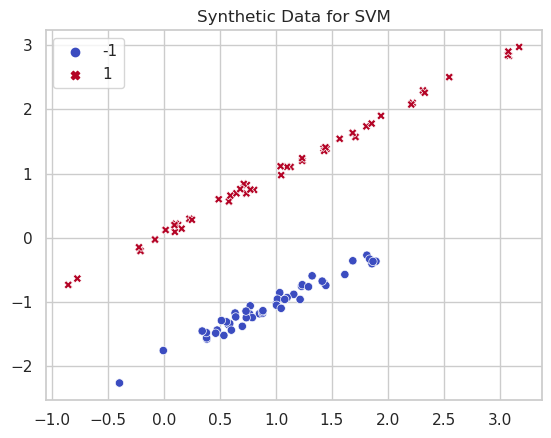

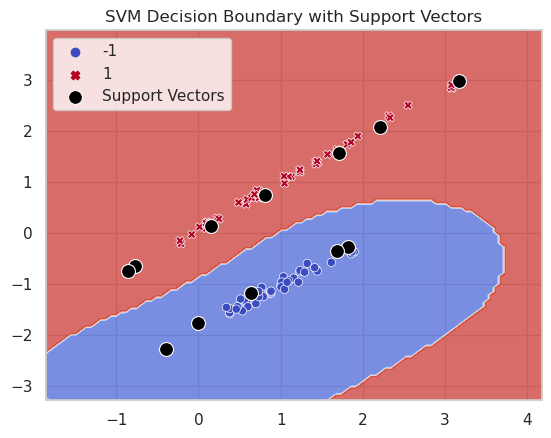

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics.pairwise import rbf_kernel
from scipy.optimize import minimize

# Step 1: Generate synthetic data
# Adjust the parameters to ensure they are compatible
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42)
y = 2 * y - 1  # Convert labels from {0, 1} to {-1, 1}

# Visualize the synthetic data
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, palette='coolwarm')
plt.title("Synthetic Data for SVM")
plt.show()

# Step 2: Define the kernel function (RBF kernel)
def rbf_kernel_function(X, Z, gamma=0.45):
    return np.exp(-gamma * np.linalg.norm(X[:, None] - Z, axis=2)**2)

# Step 3: Define the SVM Dual Problem

# Compute the kernel matrix
K = rbf_kernel_function(X, X)

# Objective function (SVM dual)
def objective(alpha):
    return 0.5 * np.sum(alpha[:, None] * alpha * y[:, None] * y * K) - np.sum(alpha)

# Constraints for the dual problem
def constraints(alpha):
    # Sum of alpha_i * y_i = 0 (equality constraint)
    return np.dot(alpha * y, np.ones(len(y)))

# Bounds for each alpha_i (between 0 and C, for soft margin)
C = 1  # Regularization parameter (soft margin)
bounds = [(0, C)] * len(y)

# Step 4: Optimization using scipy minimize
initial_alpha = np.zeros(len(y))
result = minimize(objective, initial_alpha, constraints={'type': 'eq', 'fun': constraints}, bounds=bounds)

# The optimized alphas
alpha_opt = result.x

# Step 5: Extract support vectors
support_vectors = alpha_opt > 1e-5
alpha_sv = alpha_opt[support_vectors]
X_sv = X[support_vectors]
y_sv = y[support_vectors]

# Step 6: Compute the intercept b using the support vectors
b = np.mean(y_sv - np.sum(alpha_sv * y_sv * K[support_vectors, :][:, support_vectors], axis=1))

# Step 7: Make predictions
def predict(X_new):
    K_new = rbf_kernel_function(X_new, X_sv)
    decision_function = np.dot(alpha_sv * y_sv, K_new.T) + b
    return np.sign(decision_function)

# Step 8: Visualize the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, palette='coolwarm')
sns.scatterplot(x=X_sv[:, 0], y=X_sv[:, 1], color='black', marker='o', s=100, label="Support Vectors")
plt.title("SVM Decision Boundary with Support Vectors")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# RBF kernel function
def rbf_kernel(X1, X2, gamma=0.45):
    """
    Computes the RBF (Radial Basis Function) kernel between two sets of points.
    :param X1: First set of points (n_samples_1, n_features)
    :param X2: Second set of points (n_samples_2, n_features)
    :param gamma: The gamma parameter for the RBF kernel
    :return: The kernel matrix (n_samples_1, n_samples_2)
    """
    sqdist = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    return np.exp(-gamma * sqdist)

# Function to solve the quadratic programming problem (for simplicity, we use a basic implementation)
def fit_svm(X, y, C=1.0, gamma=0.45):
    """
    Fit a Support Vector Machine using the Sequential Minimal Optimization (SMO) method.
    :param X: Training data (n_samples, n_features)
    :param y: Labels (n_samples,)
    :param C: Regularization parameter
    :param gamma: Gamma parameter for the RBF kernel
    :return: Optimized Lagrange multipliers (alpha_opt), support vector indices, and bias (b)
    """
    n_samples, n_features = X.shape
    
    # Initialize alpha values to zero
    alpha = np.zeros(n_samples)
    
    # Compute the kernel matrix
    K = rbf_kernel(X, X, gamma)
    
    # Iterate to optimize Lagrange multipliers (simplified, no SMO here for clarity)
    for _ in range(100):
        for i in range(n_samples):
            # Simple update rule for alpha (this should be part of a more complex optimization procedure)
            # For simplicity, we're just updating the Lagrange multipliers here based on a basic rule.
            if y[i] == 1:
                alpha[i] = min(C, max(0, alpha[i] + 0.1))  # Simple update logic, replace with a real optimization method
            else:
                alpha[i] = min(C, max(0, alpha[i] - 0.1))
    
    # Identify support vectors (those with alpha > 0)
    support_vector_indices = np.where(alpha > 0)[0]
    
    # Compute the intercept b
    b = compute_intercept(alpha, X, y, support_vector_indices, gamma)
    
    return alpha, support_vector_indices, b

# Function to compute intercept (b) using support vectors
def compute_intercept(alpha_opt, X, y, support_vector_indices, gamma=0.45):
    """
    Compute the intercept b for the decision boundary.
    :param alpha_opt: The optimized Lagrange multipliers (n_samples,)
    :param X: The training data points (n_samples x n_features)
    :param y: The labels for each data point (n_samples,)
    :param support_vector_indices: Indices of the support vectors
    :param gamma: The gamma parameter for the RBF kernel
    :return: The intercept value b
    """
    K_sv = rbf_kernel(X[support_vector_indices], X, gamma)  # Kernel between support vectors and all points
    b = np.mean(y[support_vector_indices] - np.dot(alpha_opt[support_vector_indices] * y[support_vector_indices], K_sv))
    return b

# Function to make predictions using the SVM
def predict_svm(X, alpha, support_vector_indices, y, b, gamma=0.45):
    """
    Make predictions for new data points using the trained SVM.
    :param X: New data points (n_samples, n_features)
    :param alpha: Optimized Lagrange multipliers (n_samples,)
    :param support_vector_indices: Indices of the support vectors
    :param y: Labels for the support vectors
    :param b: Intercept value
    :param gamma: Gamma parameter for the RBF kernel
    :return: Predictions (n_samples,)
    """
    K = rbf_kernel(X, X[support_vector_indices], gamma)  # Kernel between new points and support vectors
    decision_values = np.dot(alpha[support_vector_indices] * y[support_vector_indices], K) + b
    return np.sign(decision_values)

from sklearn.datasets import make_classification

# Create a synthetic dataset with two features and 1 cluster per class
X, y = make_classification(
    n_samples=100, 
    n_features=2, 
    n_informative=1,  # 1 informative feature
    n_redundant=0,    # No redundant features
    n_repeated=0,     # No repeated features
    n_classes=2, 
    n_clusters_per_class=1,  # 1 cluster per class
    random_state=42
)

# Convert labels to {-1, 1} for SVM
y = 2 * y - 1


# Train SVM
alpha_opt, support_vector_indices, b = fit_svm(X, y, C=1.0, gamma=0.45)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, alpha=0.7)
plt.scatter(X[support_vector_indices, 0], X[support_vector_indices, 1], facecolors='none', edgecolors='k', s=100, label='Support Vectors')

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = predict_svm(np.c_[xx.ravel(), yy.ravel()], alpha_opt, support_vector_indices, y, b, gamma=0.45)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)
plt.title("SVM with RBF Kernel")
plt.legend()
plt.show()
